# Week1,2

Преобразовать данные в фичи и посмотреть их влияние на будущую доходность (в интервалах 3, 12, 24 часа)
Ответить на следующие вопросы:
1. В моменты сильного роста рынка какие активы лучше всего растут? Как
ведут себя эти активы в моменты сильного падения рынка?
2. Какой будущий период лучше всего может быть объяснен с помощью
данных? Почему?
3. Необходимо вычленить лучшие индикаторы и дать им личную оценку с точки
зрения предиктовности. Как вы можете оценить какой период индикаторов
лучше всего применим для оценки будущей доходности?
4. Можем ли мы, учитывая значения момента, сказать об устойчивой
зависимости будущей доходности и ранка капитализации актива?
5. Можно ли по агрегированному индексу дать оценку того, как сильно упадет
рынок в ближайшее время? А вырастет?
6. Имеет ли значение величина стоимости актива относительно остальных?
7. Как ведут себя outliers по моменту/волатильности и их изменениям.
8. Как коррелируют активы между собой? Можем ли мы определить текущую
фазу рынка, используя матрицу корреляции?

Ответы:
    
  Ответы:
    1. В моменты сильного роста рынка будут сильнее всего расти активы, у которых максимальная положительная бета к фактору роста рынка(CAPM). Они же и сильнее всего упадут, особенно если при этом несут дополнительные риски, например, риск потери ликвидности.
    
    2. С помощью данных лучше всего может быть объяснен ближайший период с учетом их частотности, так как чем на более долгий период исследователь старается сделать прогноз, тем больше неопределенность и ниже точность такого прогноза.
    
    3. Я думаю, что нужно выбирать период индикаторов сопоставимым с тем горизонтом прогнозирования, который мы определили. Какие из них окажутся лучше покажет данная работа.
    
    4. Не можем, так как использование стратегии момента предполагает то, что в будущем актив будет вести себя так же как на бектесте, а это далеко не всегда так. 
    
    5. Индекс S&P 500 публикуется с 1957 года. Однако с того времени, финансовый мир пережил несколько очень серьезных кризисов. Если бы это можно было сделать, то их бы предсказали.
    
    6.Не знаю примеров, когда величина стоимости актива относительно остальных имела какое-то сильное значение. Возможно, есть влияние через ликвидность. Если предположить, что какие-то дорогие активы достаточно трудно продать в кризисные времена.
    
    7.Если понимать outliers именно как выбросы в самих данных из-за ошибок при их сборе, то они никак не зависят от момента и волатильности.
    
    8. Финансовые ативы достаточно сильно коррелируют между собой, так как в их ожидаемых доходностях часто сидят одни и те же риски(рыночный риск, процентный, кредитный, риск потери ликвидности, хвостовой и т.д.), однако есть различия по странам и отраслям и др. В кризис корреляции между активами резко возрастают, таким образом мы можем определить фазу рынка.

# Очистка и подготовка датасета

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('C:/Users/egoro/Downloads/market_data_train.csv')  

In [3]:
df.isnull().sum(axis=0)
df=df.drop_duplicates()
df.sort_values(by='time', inplace=True)
time=df.time
df.drop(['time'],axis=1,inplace=True)
df.index=time

In [4]:
df

,symbol,open,high,low,close,market_cap,n_trades,volume,taker_buy_volume
time,,,,,,,,,
2018-01-01 00:00:00,LTC,223.5000,223.8900,222.8400,223.6900,1.220456e+10,26,1.062712e+04,6.920645e+03
2018-01-01 00:00:00,ETH,733.9900,734.0000,733.9800,733.9800,7.097013e+10,30,9.372511e+03,4.398150e+03
2018-01-01 00:00:00,BTC,13740.9600,13741.0000,13697.6100,13716.3600,2.300844e+11,104,6.772622e+04,1.557492e+04
2018-01-01 00:00:00,BNB,8.5299,8.5479,8.5299,8.5300,8.445894e+08,13,2.433547e+03,2.433547e+03
2018-01-01 00:00:00,NEO,74.8530,74.8530,74.8530,74.8530,4.865445e+09,4,2.133311e+02,1.962646e+02
...,...,...,...,...,...,...,...,...,...
2021-05-31 20:00:00,DREP,0.6390,0.6520,0.6390,0.6490,2.589510e+07,314,5.886856e+04,3.509098e+04
2021-05-31 20:00:00,UMA,13.4060,13.5900,13.3990,13.5700,8.246164e+08,279,5.196124e+04,1.814473e+04
2021-05-31 20:00:00,UNFI,10.2970,11.2250,10.2970,10.9040,4.393321e+07,11928,2.106410e+06,1.110313e+06


In [338]:
df_close=pd.DataFrame(index=df.index.unique())
for column in df['symbol'].unique():
    df_close[column] = df['close'].loc[(df['symbol'] == column)]
    df_close[column+'_market_cap'] = df['market_cap'].loc[(df['symbol'] == column)]

<ipython-input-338-e8de06ebe2c2>:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-338-e8de06ebe2c2>:4: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



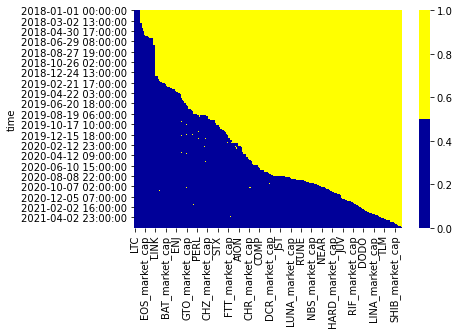

In [339]:
cols = df_close.columns
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(df_close[cols].isnull(), cmap=sns.color_palette(colours))

In [340]:
df_close_mostold=df_close.loc[df_close.index>'2019-01-01 00:00:00']
df_close_mostold.interpolate(limit_direction='forward',inplace=True)
frac = len(df_close_mostold) * 1
df_close_mostold=df_close_mostold.dropna(thresh=frac, axis=1)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:10713: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [341]:
df_close_mostold

,LTC,LTC_market_cap,ETH,ETH_market_cap,BTC,BTC_market_cap,BNB,BNB_market_cap,NEO,NEO_market_cap,...,TRX,TRX_market_cap,ETC,ETC_market_cap,ICX,ICX_market_cap,NULS,NULS_market_cap,VET,VET_market_cap
time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 01:00:00,29.96,1.792128e+09,131.82,1.372572e+10,3700.31,6.459178e+10,6.0425,7.903548e+08,7.405,4.813250e+08,...,0.01861,1.240072e+09,4.9858,5.343941e+08,0.2332,1.103984e+08,0.3910,1.765155e+07,0.003921,2.174380e+08
2019-01-01 02:00:00,29.74,1.778982e+09,131.14,1.365503e+10,3689.69,6.440681e+10,5.9821,7.824545e+08,7.391,4.804150e+08,...,0.01848,1.231411e+09,4.9597,5.316013e+08,0.2326,1.101144e+08,0.3860,1.742583e+07,0.003899,2.162180e+08
2019-01-01 03:00:00,29.72,1.777804e+09,130.72,1.361141e+10,3690.00,6.441232e+10,5.9351,7.763070e+08,7.371,4.791150e+08,...,0.01850,1.232744e+09,4.9354,5.290019e+08,0.2316,1.096410e+08,0.3851,1.738520e+07,0.003890,2.157189e+08
2019-01-01 04:00:00,29.78,1.781410e+09,131.32,1.367398e+10,3693.13,6.446723e+10,5.8648,7.671118e+08,7.373,4.792450e+08,...,0.01864,1.242074e+09,4.9819,5.339909e+08,0.2316,1.096410e+08,0.3829,1.728588e+07,0.003887,2.155526e+08
2019-01-01 05:00:00,29.92,1.789799e+09,132.35,1.378134e+10,3692.71,6.446022e+10,5.9175,7.740049e+08,7.390,4.803500e+08,...,0.01877,1.250737e+09,4.9945,5.353455e+08,0.2333,1.104458e+08,0.3855,1.740325e+07,0.003888,2.156080e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-31 16:00:00,184.58,1.232116e+10,2637.48,3.062112e+11,36961.16,6.920187e+11,346.7700,5.320593e+10,54.198,3.823064e+09,...,0.07567,5.422486e+09,68.0550,7.915702e+09,1.1102,7.002638e+08,0.5956,5.933411e+07,0.118720,7.635545e+09
2021-05-31 17:00:00,185.15,1.235921e+10,2634.80,3.059030e+11,37117.24,6.949437e+11,349.1700,5.357416e+10,54.399,3.837242e+09,...,0.07564,5.420336e+09,67.8180,7.888135e+09,1.1082,6.989107e+08,0.5931,5.908506e+07,0.120790,7.768679e+09
2021-05-31 18:00:00,182.72,1.219700e+10,2615.56,3.036693e+11,36934.73,6.915266e+11,345.0000,5.293435e+10,53.790,3.794284e+09,...,0.07500,5.374474e+09,67.2500,7.822069e+09,1.1085,6.990999e+08,0.5898,5.875631e+07,0.118850,7.643906e+09


In [342]:
df_close_mostold.isnull().sum(axis=0)


LTC                0
LTC_market_cap     0
ETH                0
ETH_market_cap     0
BTC                0
BTC_market_cap     0
BNB                0
BNB_market_cap     0
NEO                0
NEO_market_cap     0
QTUM               0
QTUM_market_cap    0
ADA                0
ADA_market_cap     0
XRP                0
XRP_market_cap     0
EOS                0
EOS_market_cap     0
IOTA               0
IOTA_market_cap    0
XLM                0
XLM_market_cap     0
ONT                0
ONT_market_cap     0
TRX                0
TRX_market_cap     0
ETC                0
ETC_market_cap     0
ICX                0
ICX_market_cap     0
NULS               0
NULS_market_cap    0
VET                0
VET_market_cap     0
dtype: int64

In [343]:
def estimate_returns(df:pd.Series) ->pd.Series:
    ret=df.pct_change().dropna()
    return ret

In [361]:
df_close_mostold.index=pd.DatetimeIndex(df_close_mostold.index)

for column in df_close_mostold.columns.unique():
    if len(column)<=4:
        df_close_mostold_returns[column]=estimate_returns(df_close_mostold[column])
    else:
        df_close_mostold_returns[column]=df_close_mostold[column]


In [362]:
df_close_mostold_returns

,LTC,LTC_market_cap,ETH,ETH_market_cap,BTC,BTC_market_cap,BNB,BNB_market_cap,NEO,NEO_market_cap,...,TRX,TRX_market_cap,ETC,ETC_market_cap,ICX,ICX_market_cap,NULS,NULS_market_cap,VET,VET_market_cap
time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 02:00:00,-0.007343,1.778982e+09,-0.005159,1.365503e+10,-0.002870,6.440681e+10,-0.009996,7.824545e+08,-0.001891,4.804150e+08,...,-0.006985,1.231411e+09,-0.005235,5.316013e+08,-0.002573,1.101144e+08,-0.012788,1.742583e+07,-0.005611,2.162180e+08
2019-01-01 03:00:00,-0.000672,1.777804e+09,-0.003203,1.361141e+10,0.000084,6.441232e+10,-0.007857,7.763070e+08,-0.002706,4.791150e+08,...,0.001082,1.232744e+09,-0.004899,5.290019e+08,-0.004299,1.096410e+08,-0.002332,1.738520e+07,-0.002308,2.157189e+08
2019-01-01 04:00:00,0.002019,1.781410e+09,0.004590,1.367398e+10,0.000848,6.446723e+10,-0.011845,7.671118e+08,0.000271,4.792450e+08,...,0.007568,1.242074e+09,0.009422,5.339909e+08,0.000000,1.096410e+08,-0.005713,1.728588e+07,-0.000771,2.155526e+08
2019-01-01 05:00:00,0.004701,1.789799e+09,0.007843,1.378134e+10,-0.000114,6.446022e+10,0.008986,7.740049e+08,0.002306,4.803500e+08,...,0.006974,1.250737e+09,0.002529,5.353455e+08,0.007340,1.104458e+08,0.006790,1.740325e+07,0.000257,2.156080e+08
2019-01-01 06:00:00,0.003008,1.795199e+09,0.003022,1.382309e+10,0.001958,6.458666e+10,0.002839,7.762023e+08,-0.002165,4.793100e+08,...,0.005860,1.258068e+09,0.010572,5.410107e+08,-0.001286,1.103038e+08,0.003372,1.746194e+07,0.005144,2.167171e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-31 16:00:00,0.027557,1.232116e+10,0.037226,3.062112e+11,0.009305,6.920187e+11,0.020752,5.320593e+10,0.019162,3.823064e+09,...,0.018713,5.422486e+09,0.021279,7.915702e+09,0.014530,7.002638e+08,0.006081,5.933411e+07,0.021511,7.635545e+09
2021-05-31 17:00:00,0.003088,1.235921e+10,-0.001016,3.059030e+11,0.004223,6.949437e+11,0.006921,5.357416e+10,0.003709,3.837242e+09,...,-0.000396,5.420336e+09,-0.003482,7.888135e+09,-0.001801,6.989107e+08,-0.004197,5.908506e+07,0.017436,7.768679e+09
2021-05-31 18:00:00,-0.013124,1.219700e+10,-0.007302,3.036693e+11,-0.004917,6.915266e+11,-0.011943,5.293435e+10,-0.011195,3.794284e+09,...,-0.008461,5.374474e+09,-0.008375,7.822069e+09,0.000271,6.990999e+08,-0.005564,5.875631e+07,-0.016061,7.643906e+09


Выбор именно этих монет обсуловлен тем, что для них доступна максимальная история. На более коротких временах результаты бектестирования могут быть менее удовлетворительными.

# Определение тренировочного набора для кроссвалидации и тестового набора для итоговой проверки(для итоговой проверки оставим последние полгода)

In [363]:
for column in df_close_mostold.columns.unique():
    if len(column)>=4:
        df_close_mostold.drop([column],axis=1, inplace=True)
    else:
        continue


In [445]:
window = 125
df_close_mostold_norm=df_close_mostold.apply(lambda x: (x-x.mean())/x.std(), axis=0)
df_train = df_close_mostold_norm[:-window]
df_test = df_close_mostold_norm[-window:]
df_train_returns = df_close_mostold_returns[:-window]
df_test_returns = df_close_mostold_returns[-window:]


In [446]:
df_train_returns

,LTC,LTC_market_cap,ETH,ETH_market_cap,BTC,BTC_market_cap,BNB,BNB_market_cap,NEO,NEO_market_cap,...,TRX,TRX_market_cap,ETC,ETC_market_cap,ICX,ICX_market_cap,NULS,NULS_market_cap,VET,VET_market_cap
time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 02:00:00,-0.007343,1.778982e+09,-0.005159,1.365503e+10,-0.002870,6.440681e+10,-0.009996,7.824545e+08,-0.001891,4.804150e+08,...,-0.006985,1.231411e+09,-0.005235,5.316013e+08,-0.002573,1.101144e+08,-0.012788,1.742583e+07,-0.005611,2.162180e+08
2019-01-01 03:00:00,-0.000672,1.777804e+09,-0.003203,1.361141e+10,0.000084,6.441232e+10,-0.007857,7.763070e+08,-0.002706,4.791150e+08,...,0.001082,1.232744e+09,-0.004899,5.290019e+08,-0.004299,1.096410e+08,-0.002332,1.738520e+07,-0.002308,2.157189e+08
2019-01-01 04:00:00,0.002019,1.781410e+09,0.004590,1.367398e+10,0.000848,6.446723e+10,-0.011845,7.671118e+08,0.000271,4.792450e+08,...,0.007568,1.242074e+09,0.009422,5.339909e+08,0.000000,1.096410e+08,-0.005713,1.728588e+07,-0.000771,2.155526e+08
2019-01-01 05:00:00,0.004701,1.789799e+09,0.007843,1.378134e+10,-0.000114,6.446022e+10,0.008986,7.740049e+08,0.002306,4.803500e+08,...,0.006974,1.250737e+09,0.002529,5.353455e+08,0.007340,1.104458e+08,0.006790,1.740325e+07,0.000257,2.156080e+08
2019-01-01 06:00:00,0.003008,1.795199e+09,0.003022,1.382309e+10,0.001958,6.458666e+10,0.002839,7.762023e+08,-0.002165,4.793100e+08,...,0.005860,1.258068e+09,0.010572,5.410107e+08,-0.001286,1.103038e+08,0.003372,1.746194e+07,0.005144,2.167171e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-26 11:00:00,-0.005456,1.326237e+10,-0.005536,3.278408e+11,-0.011672,7.427868e+11,-0.000212,5.793626e+10,-0.008410,4.341524e+09,...,-0.009926,5.861043e+09,-0.013650,9.094304e+09,0.014273,7.920814e+08,-0.012250,6.104759e+07,-0.008870,8.623433e+09
2021-05-26 12:00:00,0.004580,1.332311e+10,0.002619,3.286995e+11,0.004266,7.459554e+11,0.000000,5.793626e+10,0.012072,4.393934e+09,...,0.007091,5.902606e+09,0.009925,9.184563e+09,0.006132,7.969385e+08,0.021540,6.236258e+07,0.007309,8.686462e+09
2021-05-26 13:00:00,0.010221,1.345929e+10,0.006227,3.307492e+11,0.006759,7.509991e+11,0.005032,5.822778e+10,-0.003130,4.380179e+09,...,0.010441,5.964233e+09,0.015020,9.322511e+09,0.000938,7.975607e+08,0.015495,6.332890e+07,0.010218,8.775217e+09


In [366]:
#Calculation of moving average
def ma(df, n):
    return pd.Series(df.rolling(n, min_periods=n).mean(), name='MA_' + str(n))

# exponentially weighted moving average 
def ema(df, n):
    return pd.Series(df.ewm(span=n,min_periods=n).mean(), name='EMA_' + str(n))

#Calculation of price momentum
def mom(df, n):     
    return pd.Series(df.diff(n), name='Momentum_' + str(n))  

# relative strength index
def rsi(df, period):
    delta = df.diff().dropna()
    u = delta * 0
    d = u.copy()
    u[delta > 0] = delta[delta > 0]
    d[delta < 0] = -delta[delta < 0]
    u[u.index[period-1]] = np.mean( u[:period] ) 
    u = u.drop(u.index[:(period-1)])
    d[d.index[period-1]] = np.mean( d[:period] ) 
    d = d.drop(d.index[:(period-1)])
    rs = u.ewm(com=period-1, adjust=False).mean() / d.ewm(com=period-1, adjust=False).mean()
    return 100 - 100 / (1 + rs)

In [367]:
def plot_line(ldf,lst,title='',sec_id=None,size=[350,1000]):
        
    if(sec_id != None):
        fig = make_subplots(specs=[[{"secondary_y": True}]])
    else:
        fig = go.Figure()
        
    if(len(lst) != 1):
        ii=-1
        for i in lst:
            ii+=1
            if(sec_id != None):
                fig.add_trace(go.Scatter(x=ldf.index, y=ldf[lst[ii]],mode='lines',name=lst[ii],line=dict(width=2.0)),secondary_y=sec_id[ii])
            else:
                fig.add_trace(go.Scatter(x=ldf.index, y=ldf[lst[ii]],mode='lines',name=lst[ii],line=dict(width=2.0)))
    else:
        fig.add_trace(go.Scatter(x=ldf.index, y=ldf[lst[0]],mode='lines',name=lst[0],line=dict(width=2.0)))

    fig.update_layout(height=size[0],width=size[1],template='plotly_white',title=title,
                          margin=dict(l=50,r=80,t=50,b=40));fig.show()

In [368]:
df_indicators=pd.DataFrame()
def tech_indi(df_ret,df,plot_flag=True):
    
    'Cumsum'
    df_indicators['cumsum_12_mean'] = pd.Series(np.cumsum(df_ret.resample('12h').last()-df_ret.resample('12h').mean()))
    list_cum=['cumsum_12_mean']

    'Moving Average'
    df_indicators['ma3'] = ma(df,3)
    df_indicators['ma12'] = ma(df, 12)
    df_indicators['ma24'] = ma(df, 24)
    list_ma = ['ma3','ma12','ma24']

    'Golden'
    df_indicators['golden'] = df_indicators['ma3'] > df_indicators['ma24']
    df_indicators['golden'] = df_indicators.golden.astype('int')


    'Exponentially Weighted Moving Average'
    df_indicators['ema3'] = ema(df, 3)
    df_indicators['ema12'] = ema(df, 12)
    df_indicators['ema24'] = ema(df, 24)
    list_ema = ['ema3','ema12','ema24']

    'Momentum'
    df_indicators['mom3'] = mom(df, 3)
    df_indicators['mom12'] = mom(df, 12)
    df_indicators['mom24'] = mom(df, 24)
    list_momentum = ['mom3','mom12','mom24']

    'Relative Strength Index'
    df_indicators['rsi3'] = rsi(df, 3)
    df_indicators['rsi12'] = rsi(df, 12)
    df_indicators['rsi24'] = rsi(df, 24)
    list_rsi = ['rsi3','rsi12','rsi24']

    # Plot Training Data
    if(plot_flag):
        plot_line(df_indicators.loc[df_indicators.index,list_cum],list_cum,title='Cumsum returns without mean 12h')
        plot_line(df_indicators.loc[df_indicators.index,list_ma],list_ma,title='Moving Average (window=3,12,24 samples)')
        plot_line(df_indicators.loc[df_indicators.index,list_ema],list_ema,title='Exponential Moving Average (window=3,12,24 samples)')
        plot_line(df_indicators.loc[df_indicators.index,list_momentum],list_momentum,title='Momentum')
        plot_line(df_indicators.loc[df_indicators.index,list_rsi],list_rsi,title='Relative Strength Index')




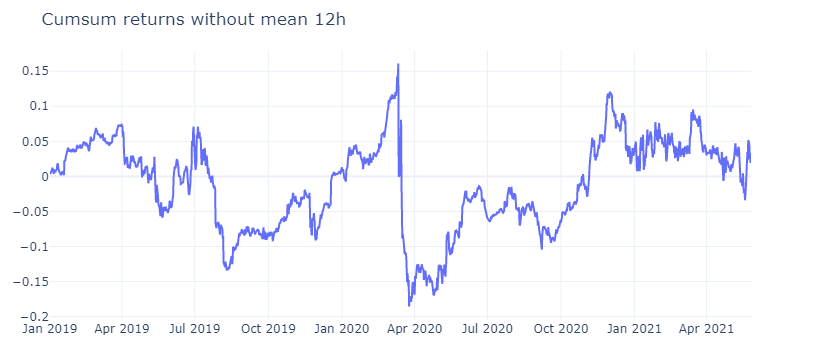

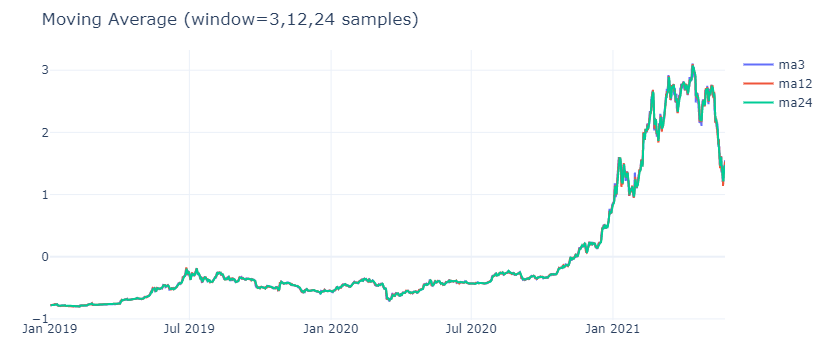

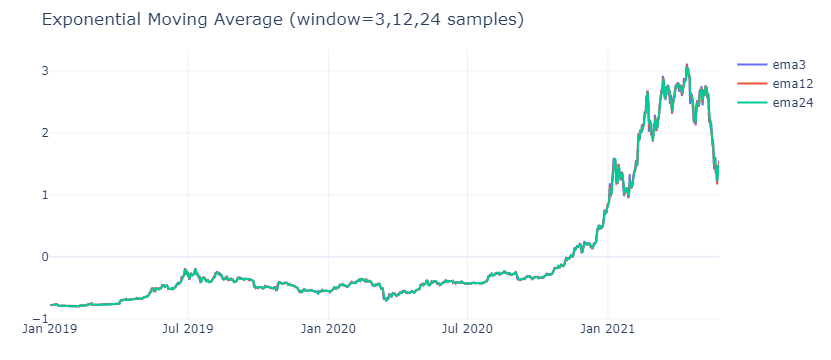

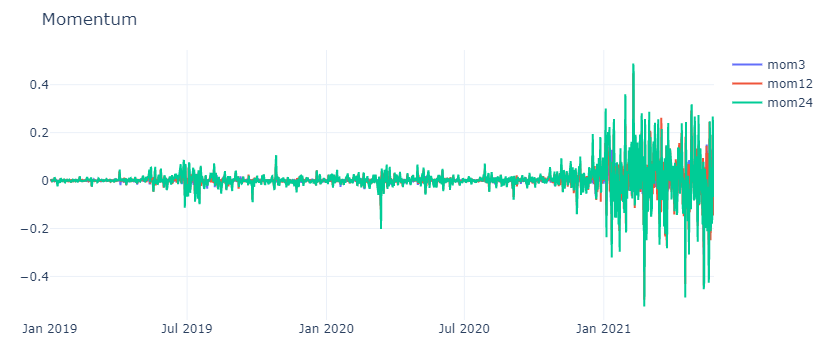

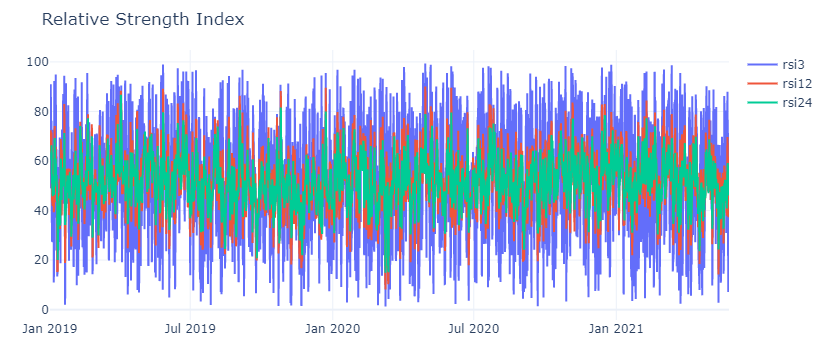

In [369]:
tech_indi(df_train_returns['BTC'],df_train['BTC'])

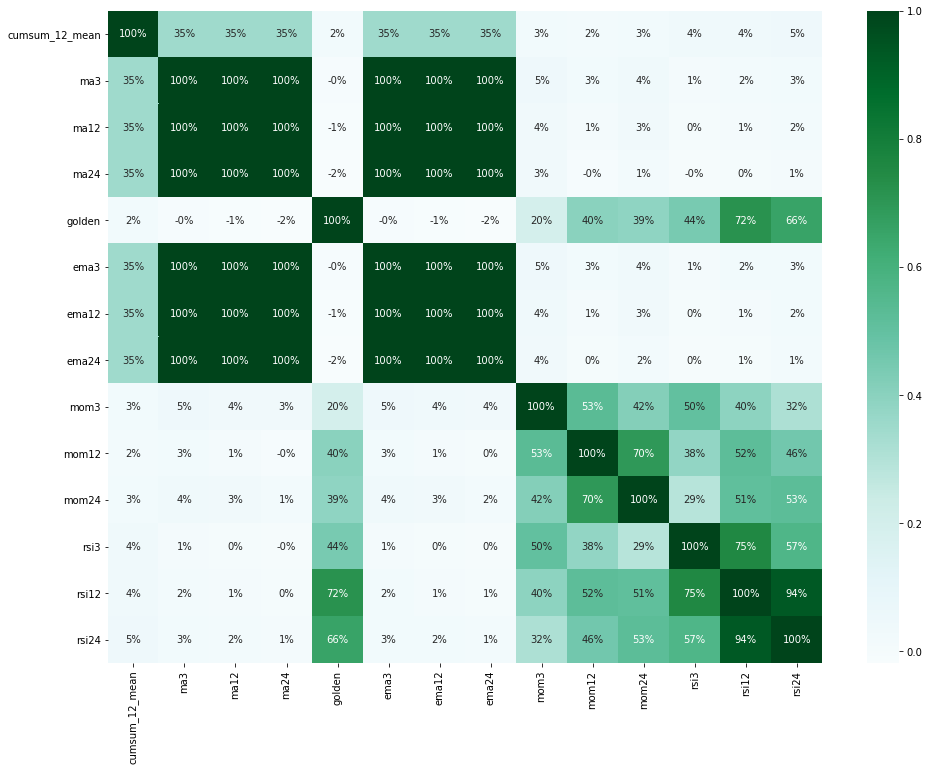

In [370]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df_indicators.corr(), annot=True, fmt='.0%', cmap='BuGn')

In [371]:
df_exp=pd.DataFrame()
df_exp['pnl_normalized']=df_indicators['cumsum_12_mean']
df_exp['feature3']=(df_train['BTC']/ma(df_train['BTC'],3))-1
df_exp['feature12']=(df_train['BTC']/ma(df_train['BTC'],12))-1
df_exp['feature24']=(df_train['BTC']/ma(df_train['BTC'],24))-1

df_exp['feature3ema']=(df_train['BTC']/ema(df_train['BTC'],3))-1
df_exp['feature12ema']=(df_train['BTC']/ema(df_train['BTC'],12))-1
df_exp['feature24ema']=(df_train['BTC']/ema(df_train['BTC'],24))-1

In [372]:
df_exp

,pnl_normalized,feature3,feature12,feature24,feature3ema,feature12ema,feature24ema
time,,,,,,,
2019-01-01 00:00:00,0.003199,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 12:00:00,0.004036,-0.000057,-0.000482,NaN,0.000080,-0.000195,NaN
2019-01-02 00:00:00,0.005747,-0.004825,-0.007430,-0.007653,-0.003683,-0.006700,-0.007237
2019-01-02 12:00:00,0.005535,-0.000358,-0.000920,-0.003805,-0.000267,-0.001455,-0.002743
2019-01-03 00:00:00,0.008130,0.000047,-0.002393,-0.004592,-0.000174,-0.002274,-0.004309
...,...,...,...,...,...,...,...
2021-05-24 12:00:00,0.043397,0.041422,0.085878,0.155677,0.029680,0.081250,0.102943
2021-05-25 00:00:00,0.024365,0.010458,0.027506,0.083309,0.005824,0.032322,0.069952
2021-05-25 12:00:00,0.033740,-0.030599,-0.075950,-0.074738,-0.026214,-0.062587,-0.056849


In [373]:
pnl_normalized_sorted_3=df_exp.loc[df_exp['feature3'].isin
                                   (df_exp['feature3'].quantile(np.array(range(0,101,1))/100,interpolation='nearest').values)]

pnl_normalized_sorted_12=df_exp.loc[df_exp['feature12'].isin
                                   (df_exp['feature12'].quantile(np.array(range(0,101,1))/100,interpolation='nearest').values)]

pnl_normalized_sorted_24=df_exp.loc[df_exp['feature24'].isin
                                   (df_exp['feature24'].quantile(np.array(range(0,101,1))/100,interpolation='nearest').values)]

pnl_normalized_sorted_3ema=df_exp.loc[df_exp['feature3ema'].isin
                                   (df_exp['feature3ema'].quantile(np.array(range(0,101,1))/100,interpolation='nearest').values)]

pnl_normalized_sorted_12ema=df_exp.loc[df_exp['feature12ema'].isin
                                   (df_exp['feature12ema'].quantile(np.array(range(0,101,1))/100,interpolation='nearest').values)]

pnl_normalized_sorted_24ema=df_exp.loc[df_exp['feature24ema'].isin
                                   (df_exp['feature24ema'].quantile(np.array(range(0,101,1))/100,interpolation='nearest').values)]

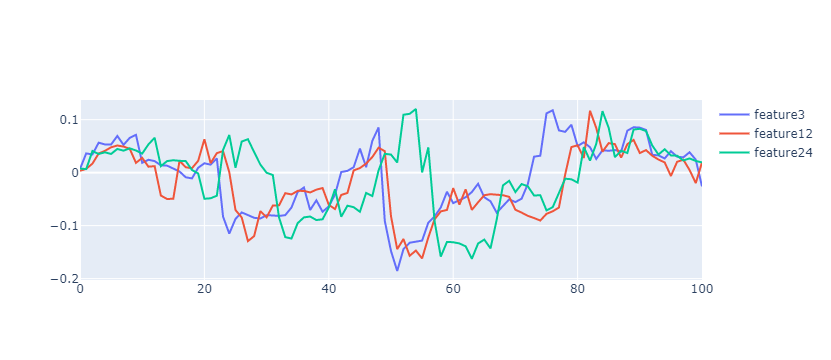

In [374]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(0,101,1)), y=pnl_normalized_sorted_3['pnl_normalized'].values, name='feature3'))
fig.add_trace(go.Scatter(x=list(range(0,101,1)), y=pnl_normalized_sorted_12['pnl_normalized'].values, name='feature12'))
fig.add_trace(go.Scatter(x=list(range(0,101,1)), y=pnl_normalized_sorted_24['pnl_normalized'].values, name='feature24'))
fig.show()

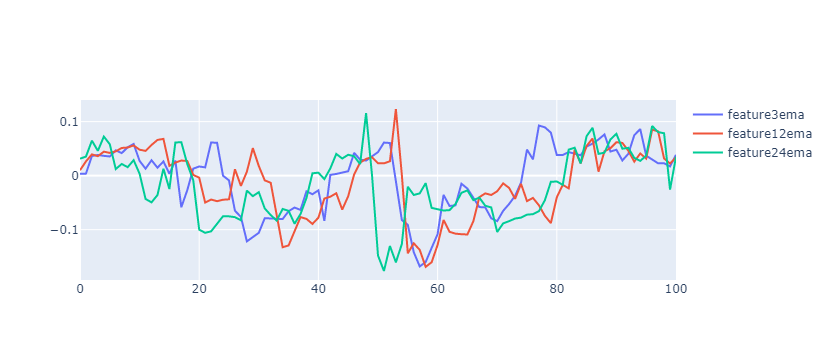

In [375]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(0,101,1)), y=pnl_normalized_sorted_3ema['pnl_normalized'].values, name='feature3ema'))
fig.add_trace(go.Scatter(x=list(range(0,101,1)), y=pnl_normalized_sorted_12ema['pnl_normalized'].values, name='feature12ema'))
fig.add_trace(go.Scatter(x=list(range(0,101,1)), y=pnl_normalized_sorted_24ema['pnl_normalized'].values, name='feature24ema'))
fig.show()

Пояснение: в примере cumsum считается для 24 часов, у меня для 12. Название фичей соответствуют частотности расчета. Если ориентироваться на данный подход, то оптимальное разделение положительных и отрицательных доходностей удается достичь для скользящего среднего с параметром 3 и экспоненциального скользящего среднего с параметром 24.

# Week 2

In [428]:
df_train_returns

,LTC,LTC_market_cap,ETH,ETH_market_cap,BTC,BTC_market_cap,BNB,BNB_market_cap,NEO,NEO_market_cap,...,ETC_market_cap,ICX,ICX_market_cap,NULS,NULS_market_cap,VET,VET_market_cap,sum_cap,r_cap,r_weighted
time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 02:00:00,-0.007343,1.778982e+09,-0.005159,1.365503e+10,-0.002870,6.440681e+10,-0.009996,7.824545e+08,-0.001891,4.804150e+08,...,5.316013e+08,-0.002573,1.101144e+08,-0.012788,1.742583e+07,-0.005611,2.162180e+08,1.041330e+11,-0.003624,-0.099806
2019-01-01 03:00:00,-0.000672,1.777804e+09,-0.003203,1.361141e+10,0.000084,6.441232e+10,-0.007857,7.763070e+08,-0.002706,4.791150e+08,...,5.290019e+08,-0.004299,1.096410e+08,-0.002332,1.738520e+07,-0.002308,2.157189e+08,1.040106e+11,-0.001173,-0.042526
2019-01-01 04:00:00,0.002019,1.781410e+09,0.004590,1.367398e+10,0.000848,6.446723e+10,-0.011845,7.671118e+08,0.000271,4.792450e+08,...,5.339909e+08,0.000000,1.096410e+08,-0.005713,1.728588e+07,-0.000771,2.155526e+08,1.042833e+11,0.002627,0.043879
2019-01-01 05:00:00,0.004701,1.789799e+09,0.007843,1.378134e+10,-0.000114,6.446022e+10,0.008986,7.740049e+08,0.002306,4.803500e+08,...,5.353455e+08,0.007340,1.104458e+08,0.006790,1.740325e+07,0.000257,2.156080e+08,1.044928e+11,0.002014,0.072962
2019-01-01 06:00:00,0.003008,1.795199e+09,0.003022,1.382309e+10,0.001958,6.458666e+10,0.002839,7.762023e+08,-0.002165,4.793100e+08,...,5.410107e+08,-0.001286,1.103038e+08,0.003372,1.746194e+07,0.005144,2.167171e+08,1.047421e+11,0.002384,0.055994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-26 11:00:00,-0.005456,1.326237e+10,-0.005536,3.278408e+11,-0.011672,7.427868e+11,-0.000212,5.793626e+10,-0.008410,4.341524e+09,...,9.094304e+09,0.014273,7.920814e+08,-0.012250,6.104759e+07,-0.008870,8.623433e+09,1.295773e+12,-0.009201,-0.103153
2021-05-26 12:00:00,0.004580,1.332311e+10,0.002619,3.286995e+11,0.004266,7.459554e+11,0.000000,5.793626e+10,0.012072,4.393934e+09,...,9.184563e+09,0.006132,7.969385e+08,0.021540,6.236258e+07,0.007309,8.686462e+09,1.301127e+12,0.004137,0.127888
2021-05-26 13:00:00,0.010221,1.345929e+10,0.006227,3.307492e+11,0.006759,7.509991e+11,0.005032,5.822778e+10,-0.003130,4.380179e+09,...,9.322511e+09,0.000938,7.975607e+08,0.015495,6.332890e+07,0.010218,8.775217e+09,1.310584e+12,0.007275,0.149381


In [461]:
df_train_returns=df_train_returns.assign(sum_cap=0)
for column in df_train_returns.columns:
    if column not in df_train_returns[df_train_returns.columns[::2]].columns:
        df_train_returns['sum_cap'] = df_train_returns['sum_cap']+ df_train_returns[column]

In [462]:
df_train_returns=df_train_returns.assign(r_cap=0)
df_train_returns=df_train_returns.assign(r_weighted=0)
for column in df_train_returns.columns:
    if column in df_train_returns[df_train_returns.columns[::2]].columns[:-2]:
        df_train_returns['r_cap']=df_train_returns['r_cap']+df_train_returns[column]*df_train_returns[column+'_market_cap']/df_train_returns['sum_cap']
        df_train_returns['r_weighted']=df_train_returns['r_weighted']+df_train_returns[column]
df_train_returns['r_weighted']=df_train_returns['r_weighted']/(df_train_returns[df_train_returns.columns[::2]].shape[1]-2)

In [463]:
df_indicators['r_cap']=df_train_returns['r_cap'].add(1).cumprod().resample('12h').last()
df_indicators['r_weighted']=df_train_returns['r_weighted'].add(1).cumprod().resample('12h').last()

In [464]:
df_indicators

,cumsum_12_mean,ma3,ma12,ma24,golden,ema3,ema12,ema24,mom3,mom12,mom24,rsi3,rsi12,rsi24,r_cap,r_weighted
time,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,0.003199,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.006597,1.008659
2019-01-01 12:00:00,0.004036,-0.780424,-0.780755,NaN,0,-0.780317,-0.780532,NaN,-0.000590,NaN,NaN,48.968871,NaN,NaN,1.012380,1.017744
2019-01-02 00:00:00,0.005747,-0.778362,-0.780405,-0.780580,1,-0.777470,-0.779831,-0.780254,0.005034,0.005773,NaN,90.994718,72.426492,NaN,1.041562,1.045852
2019-01-02 12:00:00,0.005535,-0.775475,-0.775911,-0.778158,1,-0.775405,-0.776327,-0.777330,0.000427,-0.000591,0.005182,72.425500,63.358376,60.405115,1.068428,1.078532
2019-01-03 00:00:00,0.008130,-0.770613,-0.772498,-0.774205,1,-0.770783,-0.772406,-0.773985,0.000616,0.004548,0.003957,76.220890,71.489666,66.341600,1.045016,1.049242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-24 12:00:00,0.043397,1.347406,1.292242,1.214196,1,1.362772,1.297774,1.272248,0.063140,0.189723,0.142443,87.966294,69.679134,57.887915,14.776827,13.695960
2021-05-25 00:00:00,0.024365,1.464971,1.440665,1.366453,1,1.471720,1.433943,1.383512,-0.009968,0.077073,0.266796,63.026175,64.291254,59.167329,14.204448,13.353845
2021-05-25 12:00:00,0.033740,1.376873,1.444447,1.442556,0,1.370673,1.423856,1.415194,-0.103142,-0.145549,-0.068476,7.159748,37.307107,46.088187,15.046760,14.264445


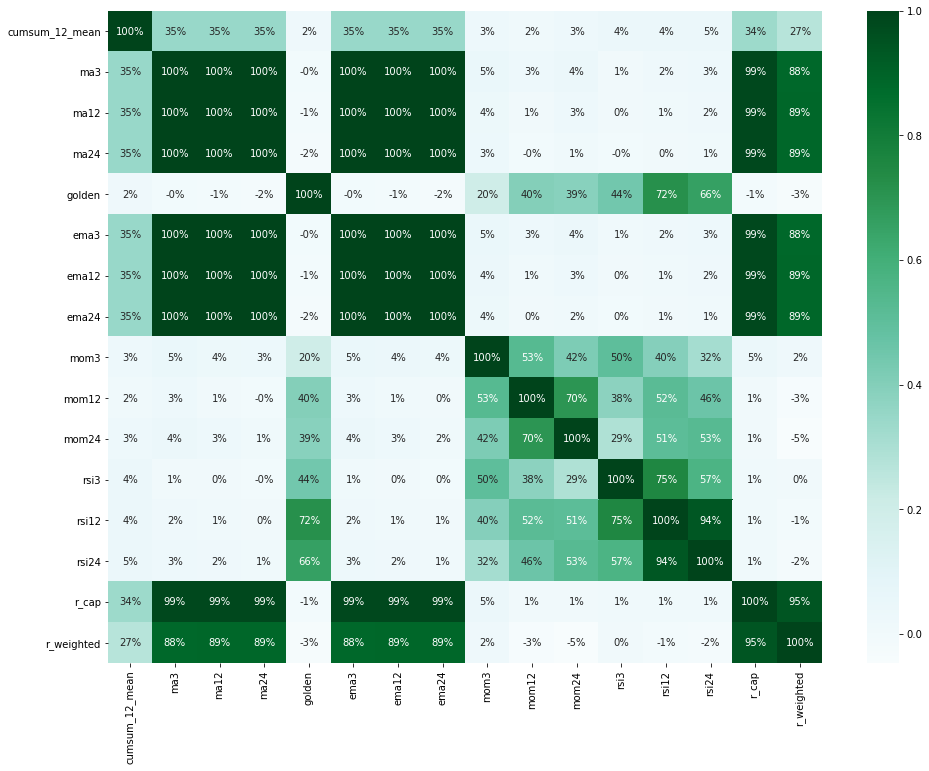

In [465]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df_indicators.corr(), annot=True, fmt='.0%', cmap='BuGn')